In [1]:
import pickle as pkl
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import plotly.graph_objects as go
from networkx.drawing.nx_pydot import graphviz_layout  # Import the correct function
import numpy as np
import pandas as pd

/home/coder/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATASET_LABELS = {
    'ag-news': 4,
    'sst2':2,
}

# Ag-news

In [3]:
dataset = 'ag-news'

In [4]:
def get_row(key, value, label, correctness, modality):
    row = {
        'Graph ID': key,
        'Graph_type': modality,
        'Classification': label,
        'Classification Outcome': True if correctness == 'correct' else False,
        'num_nodes': value['num_nodes'],
        'num_edges': value['num_edges'],
        'avg_degree': value['avg_degree'],
        'max_degree': value['max_degree'],
        'min_degree': value['min_degree'],
        'degree_variance': value['degree_variance'],
        'degree_skewness': value['degree_skewness'],
        'num_weakly_connected_components': value['num_weakly_connected_components'] if 'num_weakly_connected_components' in value else 0,
        'num_strongly_connected_components': value['num_strongly_connected_components'] if 'num_strongly_connected_components' in value else 0,
        'diameter': value['diameter'],
        'radius': value['radius'],
        'avg_path_length': value['avg_path_length'],
        'avg_clustering': value['avg_clustering'],
        'transitivity': value['transitivity'],
        'avg_betweenness': value['avg_betweenness'],
        'max_betweenness': value['max_betweenness'],
        'avg_closeness': value['avg_closeness'],
        'max_closeness': value['max_closeness'],
        'avg_eigenvector': value['avg_eigenvector'],
        'max_eigenvector': value['max_eigenvector'],
        'num_communities_louvain': value['num_communities_louvain'],
        'modularity_louvain': value['modularity_louvain'],
        'algebraic_connectivity': value['algebraic_connectivity'],
        'spectral_radius': value['spectral_radius'],
        'spectral_gap': value['spectral_gap'],
        'cycle_count': value['cycle_count'],
        'degree_assortativity': value['degree_assortativity'],
        'girth': value['girth'],
        'is_planar': value['is_planar'],
        '3_size_pattern_count': value['3_size_pattern_count'],
        '4_size_pattern_count': value['4_size_pattern_count'],
        '5_size_pattern_count': value['5_size_pattern_count'],
        'k3_count_maximal': value['k3_count_maximal'],
        'k4_count_maximal': value['k4_count_maximal'],
        'k5_count_maximal': value['k5_count_maximal'],
    }
    return row

In [5]:
columns = [
    'Graph ID', 'Graph_type', 'Classification', 'Classification Outcome', 'num_nodes', 'num_edges', 'avg_degree', 'max_degree', 'min_degree',
    'degree_variance', 'degree_skewness', 'num_weakly_connected_components',
    'num_strongly_connected_components', 'diameter', 'radius', 'avg_path_length',
    'avg_clustering', 'transitivity', 'avg_betweenness', 'max_betweenness',
    'avg_closeness', 'max_closeness', 'avg_eigenvector', 'max_eigenvector',
    'num_communities_louvain', 'modularity_louvain', 'algebraic_connectivity',
    'spectral_radius', 'spectral_gap', 'cycle_count', 'degree_assortativity',
    'girth', 'is_planar', '3_size_pattern_count', '4_size_pattern_count',
    '5_size_pattern_count', 'k3_count_maximal', 'k4_count_maximal', 'k5_count_maximal'
]

df = pd.DataFrame(columns=columns)

In [7]:
for i in range(DATASET_LABELS[dataset]):
    for modality in ['graph', 'subgraph', 'difference_graph']:
        for correctness in ['correct', 'incorrect']:
            with open(f'/home/coder/autogoal/properties/{dataset}/{i}/{modality}/{correctness}/properties.pkl', 'rb') as f:
                data = pkl.load(f)

            for key, value in data.items():
                row = get_row(key, value, i, correctness, modality)
                df = df.append(row, ignore_index=True)
                    
                

/tmp/ipykernel_35310/2435723242.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_35310/2435723242.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_35310/2435723242.py:9: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_35310/2435723242.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_35310/2435723242.py:9: FutureWarning: In a future version, object-dtype columns with all-bool val

In [49]:
df.columns

Index(['Graph ID', 'Graph_type', 'Classification', 'Classification Outcome',
       'num_nodes', 'num_edges', 'avg_degree', 'max_degree', 'min_degree',
       'degree_variance', 'degree_skewness', 'num_weakly_connected_components',
       'num_strongly_connected_components', 'diameter', 'radius',
       'avg_path_length', 'avg_clustering', 'transitivity', 'avg_betweenness',
       'max_betweenness', 'avg_closeness', 'max_closeness', 'avg_eigenvector',
       'max_eigenvector', 'num_communities_louvain', 'modularity_louvain',
       'algebraic_connectivity', 'spectral_radius', 'spectral_gap',
       'cycle_count', 'degree_assortativity', 'girth', 'is_planar',
       '3_size_pattern_count', '4_size_pattern_count', '5_size_pattern_count',
       'k3_count_maximal', 'k4_count_maximal', 'k5_count_maximal'],
      dtype='object')

In [51]:
columns_to_convert = ['num_nodes', 'num_edges', 'max_degree', 'min_degree', 'num_weakly_connected_components', 'num_strongly_connected_components', 'num_communities_louvain', '3_size_pattern_count', '4_size_pattern_count', '5_size_pattern_count', 'k3_count_maximal', 'k4_count_maximal', 'k5_count_maximal', 'diameter', 'radius',
       'avg_path_length', 'transitivity', 'modularity_louvain', 'cycle_count', 'girth']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [88]:
grouped_test = df.groupby(['Graph_type', 'Classification', 'Classification Outcome'])

In [96]:
def filter_dataframe(df, graph_type, classification, classification_outcome):
    df_filtered = df[df['Graph_type'] == graph_type]
    df_filtered = df_filtered[df_filtered['Classification Outcome'] == classification_outcome]
    df_filtered = df_filtered[df_filtered['Classification'] == classification]
    return df_filtered

In [98]:
def remove_columns(df):
    df = df.drop(columns=['spectral_gap', 'spectral_radius', 'girth', 'avg_clustering', 'avg_path_length', 'diameter', 'radius', 'degree_assortativity', 'algebraic_connectivity'])
    for column in df.columns:
        uniques = df[column].unique()
        if len(uniques) == 1:
            df = df.drop(columns=[column])
            
    return df

In [117]:
def generate_summaries(dataset, dataframe):
    summaries = {}
    for modality in ['graph', 'subgraph', 'difference_graph']:
        for classification in range(DATASET_LABELS[dataset]):
            try:
                for classification_outcome in [True, False]:
                    df_filtered = filter_dataframe(dataframe, modality, classification, classification_outcome)
                    df_filtered = remove_columns(df_filtered)
                    summaries[(modality, classification, classification_outcome)] = df_filtered.describe()
            except:
                print(f'Error in {modality}, {classification}, {classification_outcome}')
                continue
    return summaries

In [136]:
def generate_subdataframes(dataset, dataframe):
    subdataframes = {}
    for modality in ['graph', 'subgraph', 'difference_graph']:
        for classification in range(DATASET_LABELS[dataset]):
            try:
                for classification_outcome in [True, False]:
                    df_filtered = filter_dataframe(dataframe, modality, classification, classification_outcome)
                    df_filtered = remove_columns(df_filtered)
                    subdataframes[(modality, classification, classification_outcome)] = df_filtered
            except:
                print(f'Error in {modality}, {classification}, {classification_outcome}')
                continue
    return subdataframes

In [137]:
subdataframes = generate_subdataframes(dataset, df)

In [118]:
summaries = generate_summaries(dataset, df)

Error in graph, 1, False
Error in graph, 2, False
Error in subgraph, 1, False
Error in subgraph, 2, False
Error in difference_graph, 1, False
Error in difference_graph, 2, False


In [129]:
summaries[('graph', 0, True)]

,num_nodes,num_edges,avg_degree,max_degree,degree_variance,degree_skewness,num_strongly_connected_components,avg_betweenness,max_betweenness,avg_closeness,max_closeness,avg_eigenvector,max_eigenvector
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,69.666667,68.666667,1.969380,6.047619,1.446283,1.138439,69.666667,0.004048,0.026123,0.024709,0.028346,0.020632,0.805549
std,17.393485,17.393485,0.008447,1.745743,0.421189,0.610220,17.393485,0.002043,0.012536,0.006135,0.007387,0.006019,0.201666
min,41.000000,40.000000,1.951220,4.000000,1.063377,0.542544,41.000000,0.001489,0.009152,0.016254,0.018482,0.011189,0.447110
25%,64.000000,63.000000,1.968750,5.000000,1.205707,0.796805,64.000000,0.002680,0.019580,0.021023,0.024324,0.016442,0.706820
50%,66.000000,65.000000,1.969697,6.000000,1.436523,0.990510,66.000000,0.003691,0.021973,0.024504,0.027548,0.022170,0.707046
75%,75.000000,74.000000,1.973333,6.000000,1.537515,1.252714,75.000000,0.004912,0.032927,0.026153,0.029167,0.024933,0.999662
max,102.000000,101.000000,1.980392,12.000000,3.029385,3.339620,102.000000,0.010617,0.062500,0.037867,0.043902,0.034444,0.999860


In [130]:
summaries[('subgraph', 0, False)]

,num_nodes,num_edges,avg_degree,max_degree,degree_variance,degree_skewness,num_strongly_connected_components,avg_betweenness,max_betweenness,avg_closeness,max_closeness,avg_eigenvector,max_eigenvector
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,19.333333,18.333333,1.834465,4.833333,1.434402,1.184684,19.333333,0.019531,0.092076,0.109274,0.141246,0.130482,0.718128
std,14.306176,14.306176,0.107248,1.169045,0.723303,0.583816,14.306176,0.009710,0.037727,0.062950,0.087357,0.101315,0.233232
min,7.000000,6.000000,1.714286,3.000000,0.489796,0.459279,7.000000,0.006562,0.036585,0.037065,0.043902,0.035087,0.447212
25%,8.000000,7.000000,1.750000,4.250000,1.199582,0.876686,8.000000,0.014597,0.071825,0.057968,0.069940,0.047462,0.577310
50%,15.000000,14.000000,1.829545,5.000000,1.295600,1.064012,15.000000,0.017407,0.093651,0.110580,0.136905,0.104541,0.642208
75%,27.250000,26.250000,1.925549,5.750000,1.576655,1.465964,27.250000,0.026412,0.114286,0.161458,0.208333,0.198867,0.926657
max,42.000000,41.000000,1.952381,6.000000,2.687500,2.106608,42.000000,0.032738,0.142857,0.178571,0.250000,0.279979,0.999990


## Visualization

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

### Box Plots

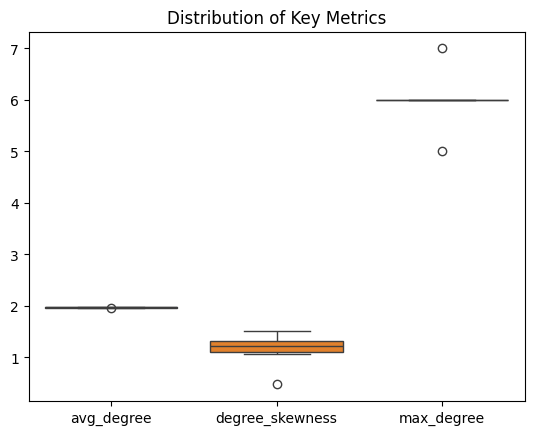

In [146]:
sns.boxplot(data=subdataframes['graph', 0, False][['avg_degree', 'degree_skewness', 'max_degree']])
plt.title("Distribution of Key Metrics")
plt.show()

### Histograms

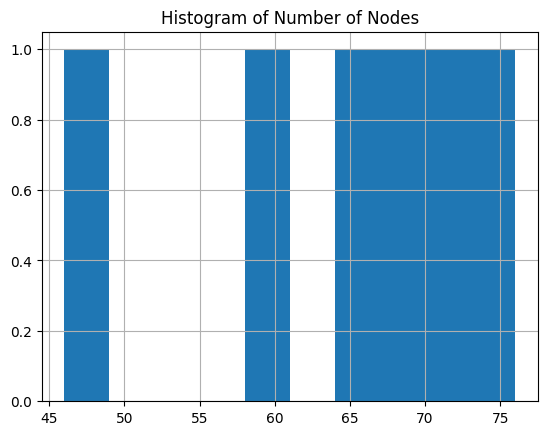

In [147]:
subdataframes['graph', 0, False]['num_nodes'].hist(bins=10)
plt.title("Histogram of Number of Nodes")
plt.show()

/tmp/ipykernel_35310/53717381.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subdataframes['graph', 0, True].corr(), annot=True, cmap='magma', fmt=".2f")


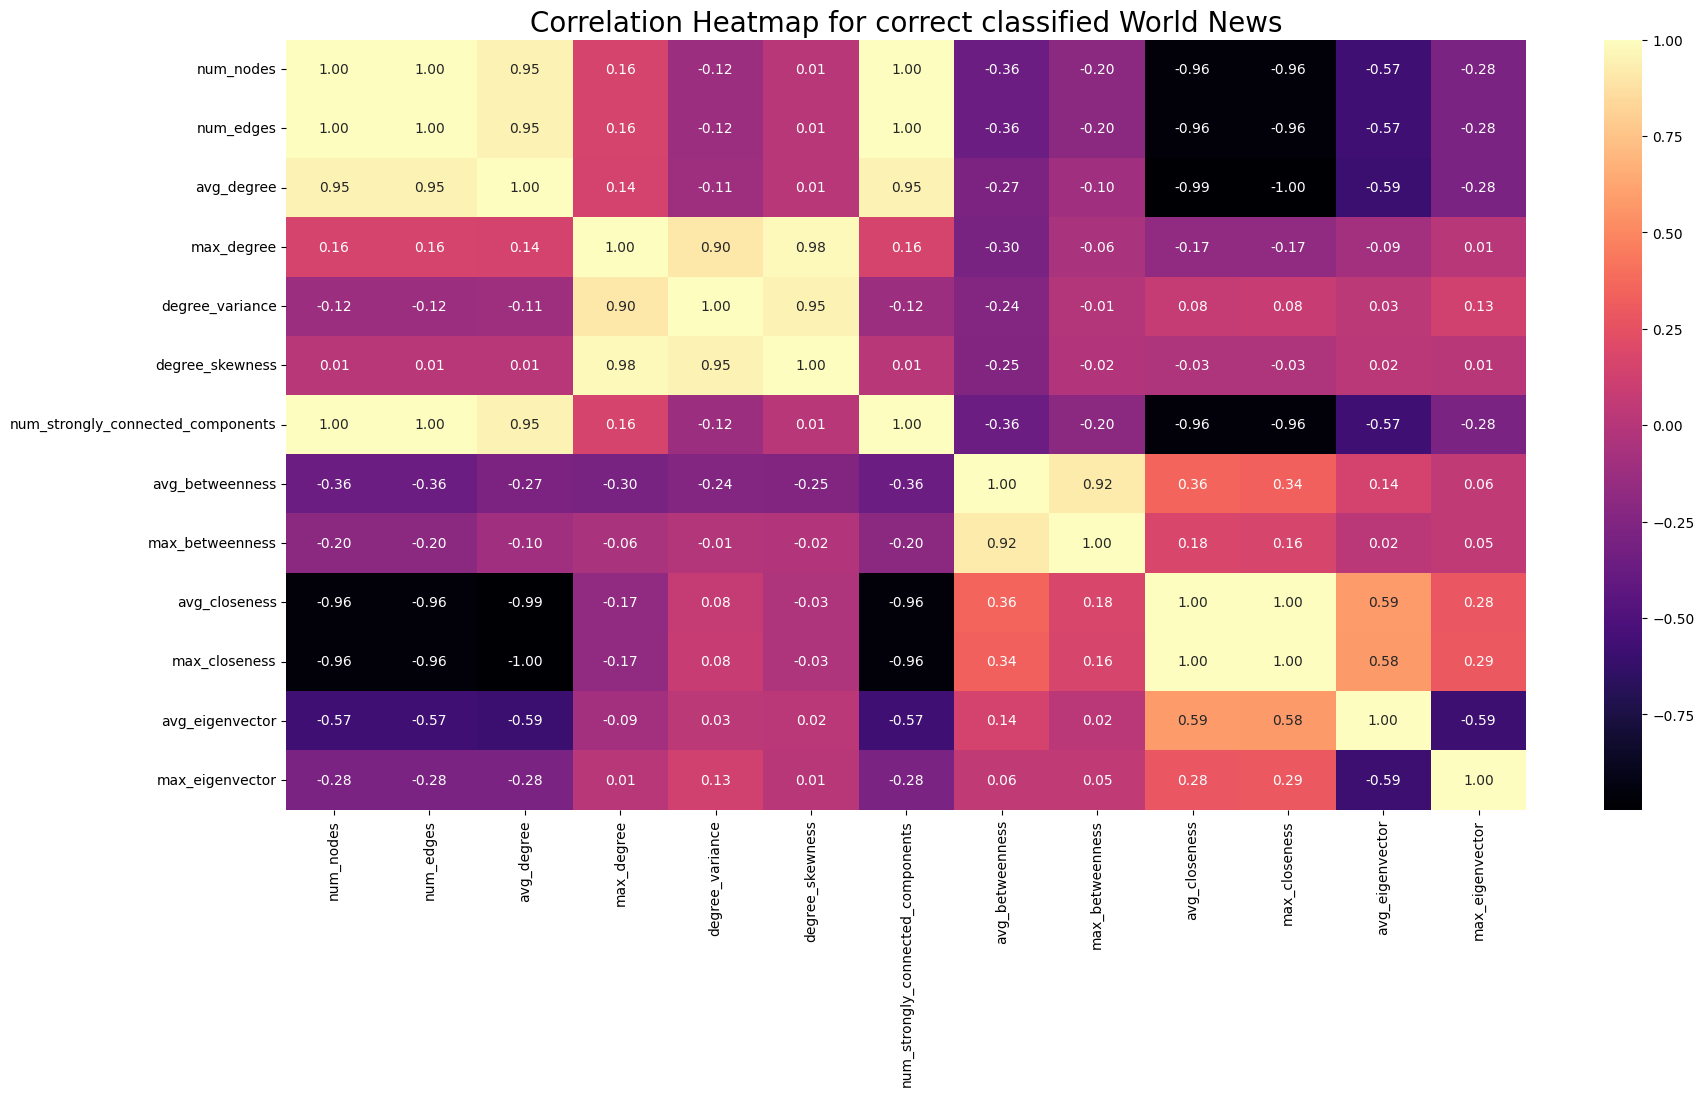

In [170]:
plt.figure(figsize=(20, 10))

sns.heatmap(subdataframes['graph', 0, True].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap for correct classified World News", fontsize=20)
plt.savefig("correlation_heatmap_right_ag-news.pdf", format='pdf', bbox_inches='tight')  # 300 DPI for high quality
plt.show()

/tmp/ipykernel_35310/3362802703.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subdataframes['graph', 0, False].corr(), annot=True, cmap='magma', fmt=".2f")


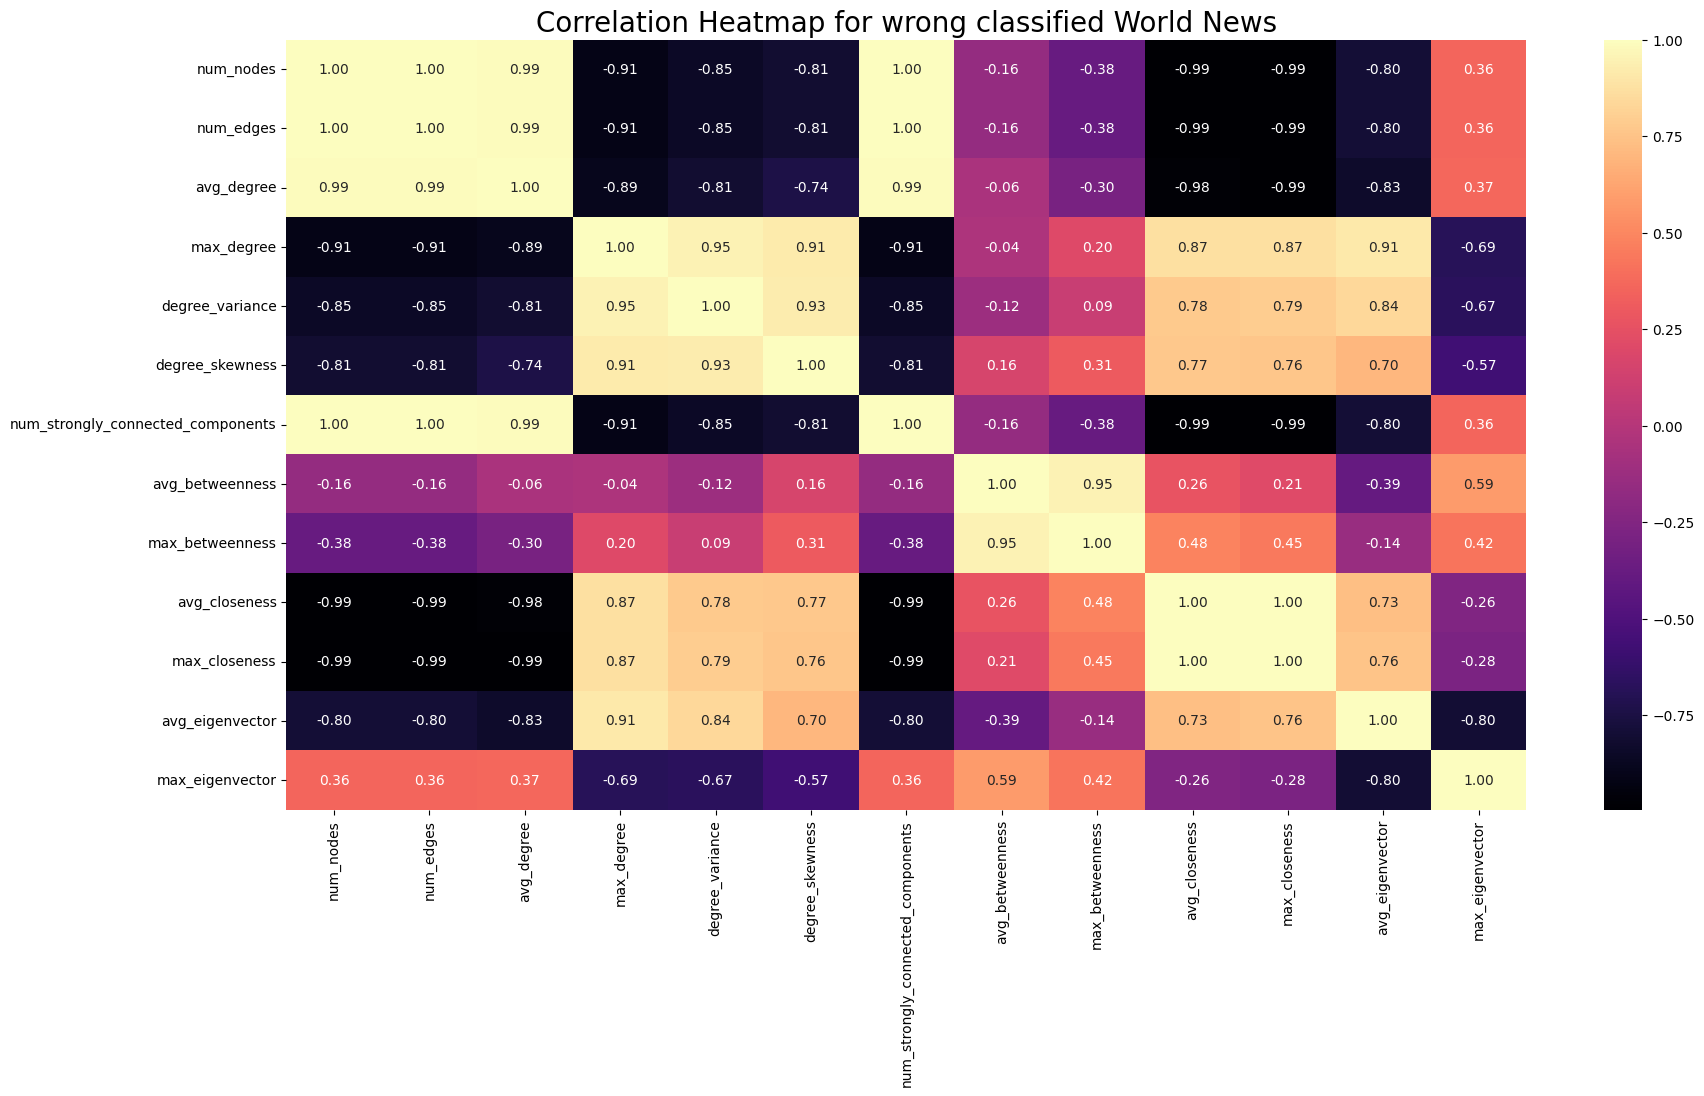

In [169]:
plt.figure(figsize=(20, 10))

sns.heatmap(subdataframes['graph', 0, False].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap for wrong classified World News", fontsize=20)
plt.savefig("correlation_heatmap_wrong_ag-news.pdf", format='pdf', bbox_inches='tight')  # 300 DPI for high quality
plt.show()

/tmp/ipykernel_35310/57155447.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subdataframes['graph', 3, True].corr(), annot=True, cmap='magma', fmt=".2f")


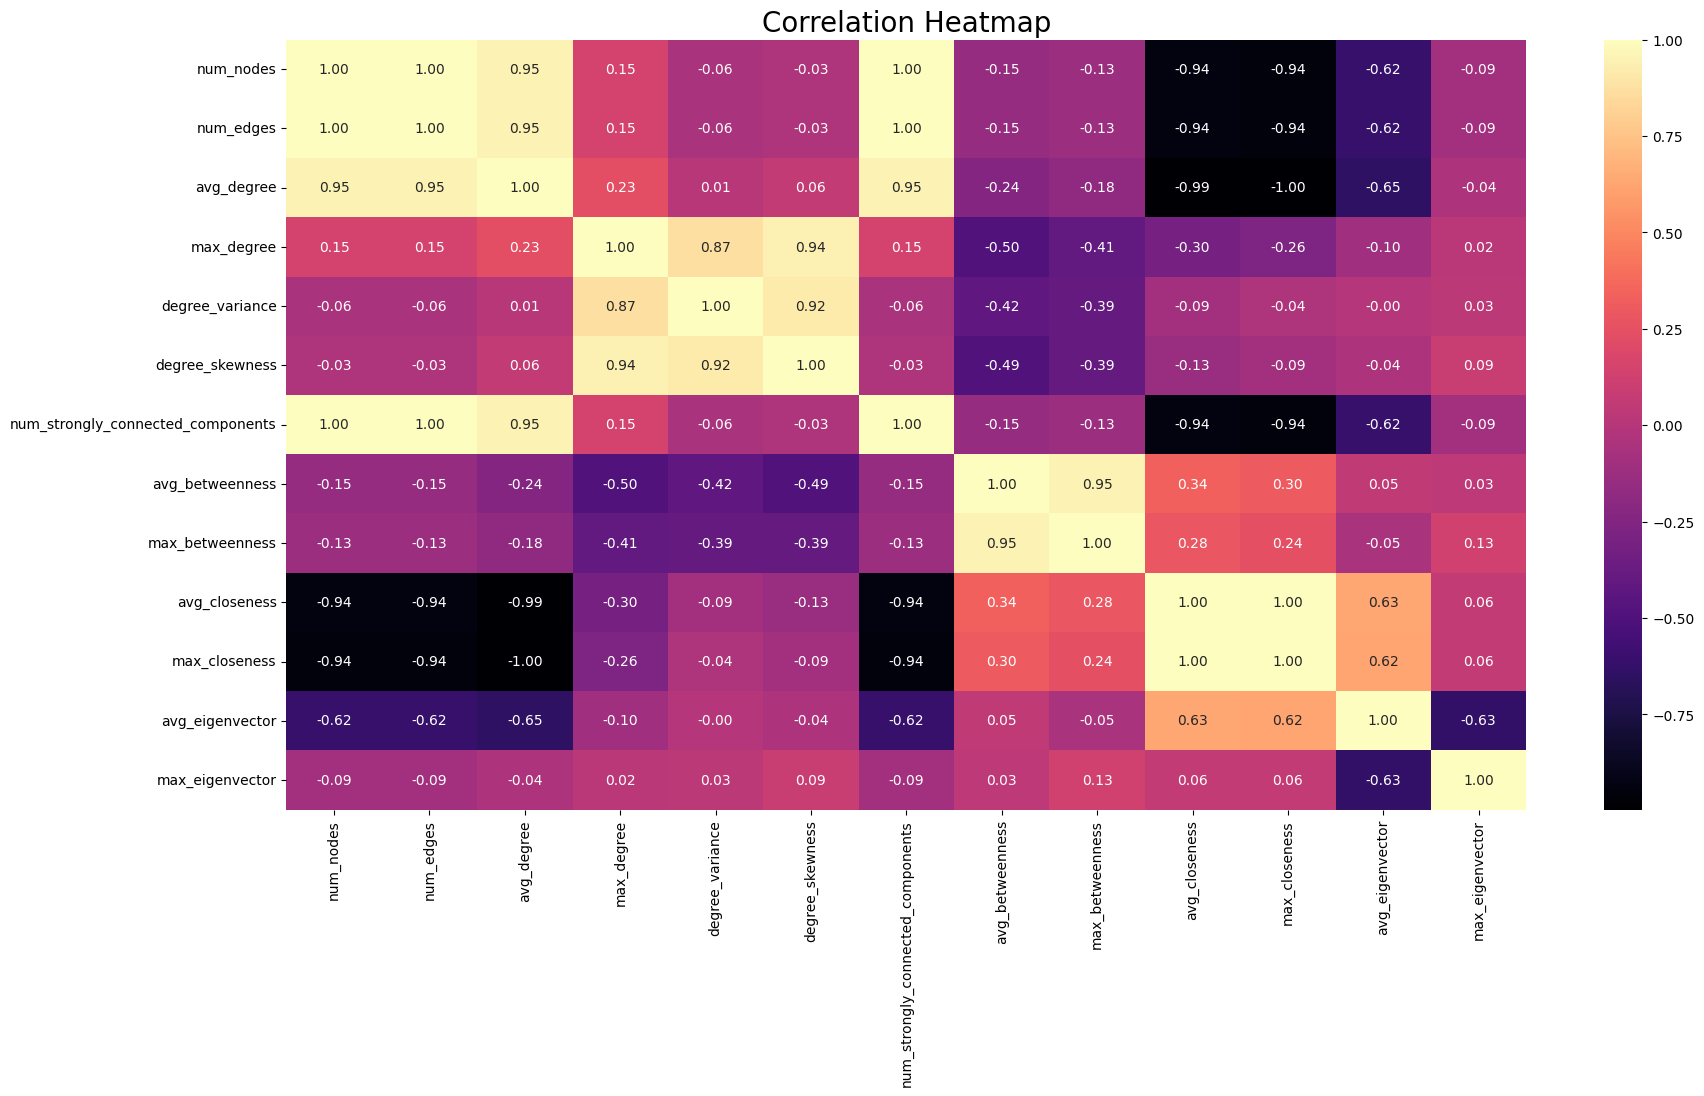

In [163]:
plt.figure(figsize=(20, 10))

sns.heatmap(subdataframes['graph', 3, True].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=20)
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')  # 300 DPI for high quality
plt.show()

/tmp/ipykernel_35310/2406148418.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subdataframes['graph', 3, False].corr(), annot=True, cmap='magma', fmt=".2f")


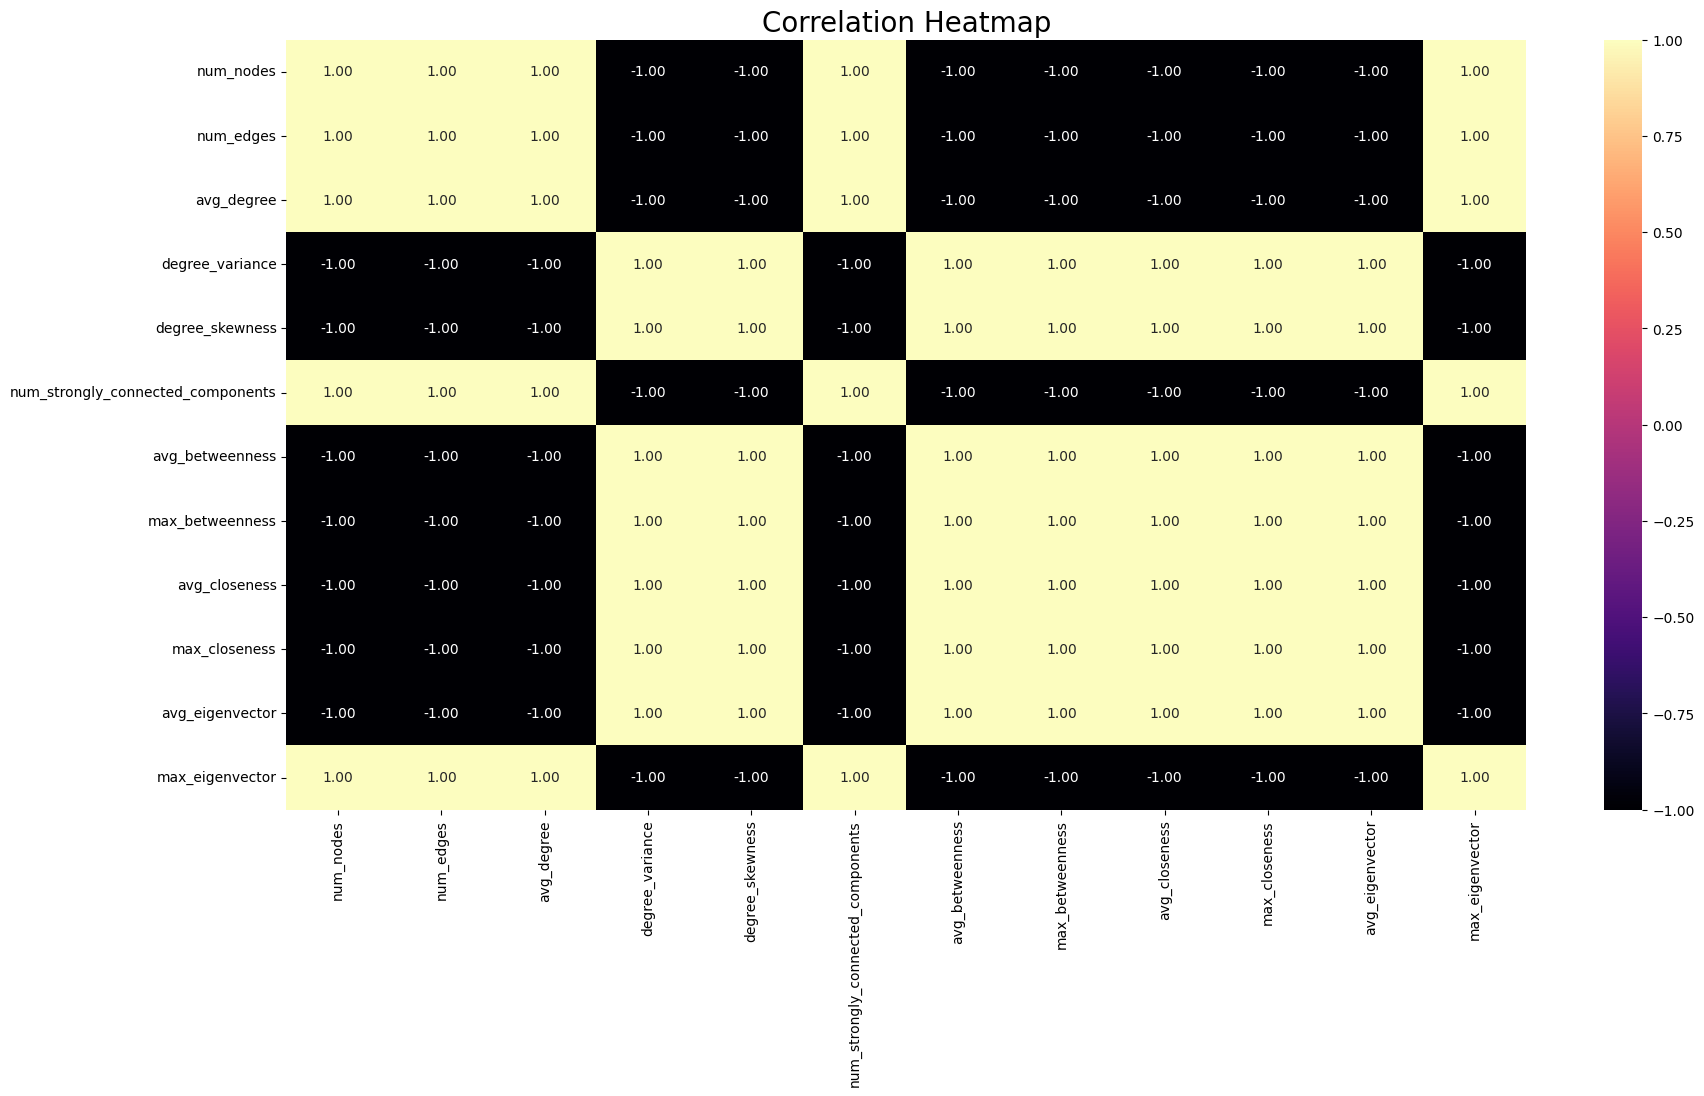

In [164]:
plt.figure(figsize=(20, 10))

sns.heatmap(subdataframes['graph', 3, False].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=20)
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')  # 300 DPI for high quality
plt.show()

### Scatter Plots

/tmp/ipykernel_35310/3129747638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.scatterplot(x='num_nodes', y='max_degree', data=subdataframes['graph', 0, False].corr())


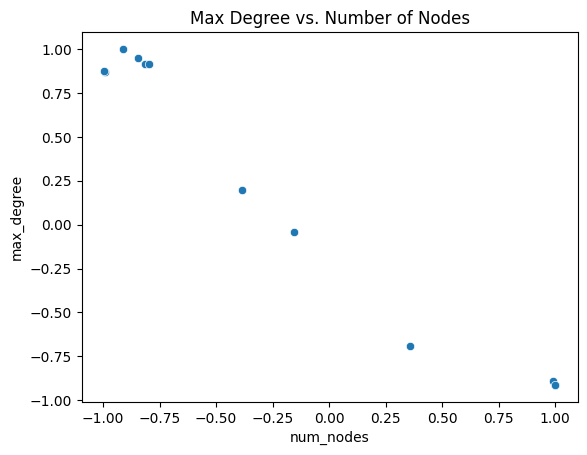

In [152]:
sns.scatterplot(x='num_nodes', y='max_degree', data=subdataframes['graph', 0, False].corr())
plt.title("Max Degree vs. Number of Nodes")
plt.show()

# SST-2

In [171]:
# SST2
dataset = 'sst2'

In [172]:
def get_row(key, value, label, correctness, modality):
    row = {
        'Graph ID': key,
        'Graph_type': modality,
        'Classification': label,
        'Classification Outcome': True if correctness == 'correct' else False,
        'num_nodes': value['num_nodes'],
        'num_edges': value['num_edges'],
        'avg_degree': value['avg_degree'],
        'max_degree': value['max_degree'],
        'min_degree': value['min_degree'],
        'degree_variance': value['degree_variance'],
        'degree_skewness': value['degree_skewness'],
        'num_weakly_connected_components': value['num_weakly_connected_components'] if 'num_weakly_connected_components' in value else 0,
        'num_strongly_connected_components': value['num_strongly_connected_components'] if 'num_strongly_connected_components' in value else 0,
        'diameter': value['diameter'],
        'radius': value['radius'],
        'avg_path_length': value['avg_path_length'],
        'avg_clustering': value['avg_clustering'],
        'transitivity': value['transitivity'],
        'avg_betweenness': value['avg_betweenness'],
        'max_betweenness': value['max_betweenness'],
        'avg_closeness': value['avg_closeness'],
        'max_closeness': value['max_closeness'],
        'avg_eigenvector': value['avg_eigenvector'],
        'max_eigenvector': value['max_eigenvector'],
        'num_communities_louvain': value['num_communities_louvain'],
        'modularity_louvain': value['modularity_louvain'],
        'algebraic_connectivity': value['algebraic_connectivity'],
        'spectral_radius': value['spectral_radius'],
        'spectral_gap': value['spectral_gap'],
        'cycle_count': value['cycle_count'],
        'degree_assortativity': value['degree_assortativity'],
        'girth': value['girth'],
        'is_planar': value['is_planar'],
        '3_size_pattern_count': value['3_size_pattern_count'],
        '4_size_pattern_count': value['4_size_pattern_count'],
        '5_size_pattern_count': value['5_size_pattern_count'],
        'k3_count_maximal': value['k3_count_maximal'],
        'k4_count_maximal': value['k4_count_maximal'],
        'k5_count_maximal': value['k5_count_maximal'],
    }
    return row

In [174]:
columns = [
    'Graph ID', 'Graph_type', 'Classification', 'Classification Outcome', 'num_nodes', 'num_edges', 'avg_degree', 'max_degree', 'min_degree',
    'degree_variance', 'degree_skewness', 'num_weakly_connected_components',
    'num_strongly_connected_components', 'diameter', 'radius', 'avg_path_length',
    'avg_clustering', 'transitivity', 'avg_betweenness', 'max_betweenness',
    'avg_closeness', 'max_closeness', 'avg_eigenvector', 'max_eigenvector',
    'num_communities_louvain', 'modularity_louvain', 'algebraic_connectivity',
    'spectral_radius', 'spectral_gap', 'cycle_count', 'degree_assortativity',
    'girth', 'is_planar', '3_size_pattern_count', '4_size_pattern_count',
    '5_size_pattern_count', 'k3_count_maximal', 'k4_count_maximal', 'k5_count_maximal'
]

df = pd.DataFrame(columns=columns)

In [175]:
for i in range(DATASET_LABELS[dataset]):
    for modality in ['graph', 'subgraph', 'difference_graph']:
        for correctness in ['correct', 'incorrect']:
            with open(f'/home/coder/autogoal/properties/{dataset}/{i}/{modality}/{correctness}/properties.pkl', 'rb') as f:
                data = pkl.load(f)

            for key, value in data.items():
                row = get_row(key, value, i, correctness, modality)
                df = df.append(row, ignore_index=True)

/tmp/ipykernel_35310/2945208234.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_35310/2945208234.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_35310/2945208234.py:9: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_35310/2945208234.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/tmp/ipykernel_35310/2945208234.py:9: FutureWarning: In a future version, object-dtype columns with all-bool val

In [176]:
df.columns

Index(['Graph ID', 'Graph_type', 'Classification', 'Classification Outcome',
       'num_nodes', 'num_edges', 'avg_degree', 'max_degree', 'min_degree',
       'degree_variance', 'degree_skewness', 'num_weakly_connected_components',
       'num_strongly_connected_components', 'diameter', 'radius',
       'avg_path_length', 'avg_clustering', 'transitivity', 'avg_betweenness',
       'max_betweenness', 'avg_closeness', 'max_closeness', 'avg_eigenvector',
       'max_eigenvector', 'num_communities_louvain', 'modularity_louvain',
       'algebraic_connectivity', 'spectral_radius', 'spectral_gap',
       'cycle_count', 'degree_assortativity', 'girth', 'is_planar',
       '3_size_pattern_count', '4_size_pattern_count', '5_size_pattern_count',
       'k3_count_maximal', 'k4_count_maximal', 'k5_count_maximal'],
      dtype='object')

In [177]:
columns_to_convert = ['num_nodes', 'num_edges', 'max_degree', 'min_degree', 'num_weakly_connected_components', 'num_strongly_connected_components', 'num_communities_louvain', '3_size_pattern_count', '4_size_pattern_count', '5_size_pattern_count', 'k3_count_maximal', 'k4_count_maximal', 'k5_count_maximal', 'diameter', 'radius',
       'avg_path_length', 'transitivity', 'modularity_louvain', 'cycle_count', 'girth']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [178]:
def filter_dataframe(df, graph_type, classification, classification_outcome):
    df_filtered = df[df['Graph_type'] == graph_type]
    df_filtered = df_filtered[df_filtered['Classification Outcome'] == classification_outcome]
    df_filtered = df_filtered[df_filtered['Classification'] == classification]
    return df_filtered

In [179]:
def remove_columns(df):
    df = df.drop(columns=['spectral_gap', 'spectral_radius', 'girth', 'avg_clustering', 'avg_path_length', 'diameter', 'radius', 'degree_assortativity', 'algebraic_connectivity'])
    for column in df.columns:
        uniques = df[column].unique()
        if len(uniques) == 1:
            df = df.drop(columns=[column])
            
    return df

In [180]:
def generate_summaries(dataset, dataframe):
    summaries = {}
    for modality in ['graph', 'subgraph', 'difference_graph']:
        for classification in range(DATASET_LABELS[dataset]):
            try:
                for classification_outcome in [True, False]:
                    df_filtered = filter_dataframe(dataframe, modality, classification, classification_outcome)
                    df_filtered = remove_columns(df_filtered)
                    summaries[(modality, classification, classification_outcome)] = df_filtered.describe()
            except:
                print(f'Error in {modality}, {classification}, {classification_outcome}')
                continue
    return summaries

In [181]:
def generate_subdataframes(dataset, dataframe):
    subdataframes = {}
    for modality in ['graph', 'subgraph', 'difference_graph']:
        for classification in range(DATASET_LABELS[dataset]):
            try:
                for classification_outcome in [True, False]:
                    df_filtered = filter_dataframe(dataframe, modality, classification, classification_outcome)
                    df_filtered = remove_columns(df_filtered)
                    subdataframes[(modality, classification, classification_outcome)] = df_filtered
            except:
                print(f'Error in {modality}, {classification}, {classification_outcome}')
                continue
    return subdataframes

In [184]:
df

,Graph ID,Graph_type,Classification,Classification Outcome,num_nodes,num_edges,avg_degree,max_degree,min_degree,degree_variance,...,cycle_count,degree_assortativity,girth,is_planar,3_size_pattern_count,4_size_pattern_count,5_size_pattern_count,k3_count_maximal,k4_count_maximal,k5_count_maximal
0,9,graph,0,True,61,60,1.967213,5,1,1.080892,...,0,NaN,0,None,0,0,0,0,0,0
1,247,graph,0,True,56,55,1.964286,5,1,1.320153,...,0,NaN,0,None,0,0,0,0,0,0
2,13,graph,0,True,38,37,1.947368,5,1,1.207756,...,0,NaN,0,None,0,0,0,0,0,0
3,542,graph,0,True,13,12,1.846154,4,1,1.207101,...,0,inf,0,None,0,0,0,0,0,0
4,212,graph,0,True,19,18,1.894737,5,1,1.462604,...,0,NaN,0,None,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,207,difference_graph,1,True,10,9,1.800000,6,1,2.360000,...,0,-inf,0,None,0,0,0,0,0,0
270,484,difference_graph,1,True,18,17,1.888889,3,1,0.765432,...,0,-inf,0,None,0,0,0,0,0,0
271,777,difference_graph,1,True,34,33,1.941176,4,1,1.114187,...,0,2.443467e-08,0,None,0,0,0,0,0,0
272,63,difference_graph,1,True,29,28,1.931034,5,1,1.719382,...,0,NaN,0,None,0,0,0,0,0,0


In [205]:
subdataframes = generate_subdataframes(dataset, df)
summaries = generate_summaries(dataset, df)

Error in graph, 1, False
Error in subgraph, 1, False
Error in difference_graph, 1, False


In [209]:
filtered_df = filter_dataframe(df, 'graph', 0, False)

## Visualization

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

### Box Plots

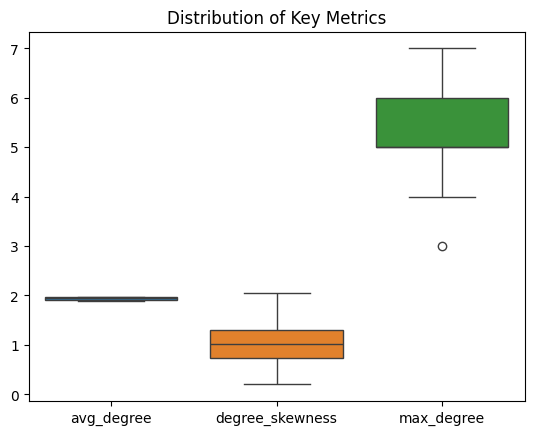

In [186]:
sns.boxplot(data=subdataframes['graph', 0, False][['avg_degree', 'degree_skewness', 'max_degree']])
plt.title("Distribution of Key Metrics")
plt.show()

### Histograms

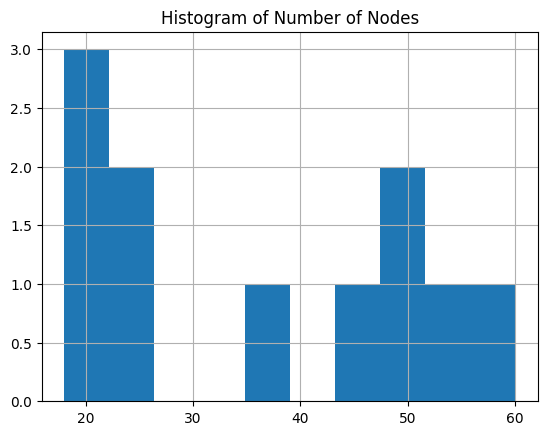

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [187]:
subdataframes['graph', 0, False]['num_nodes'].hist(bins=10)
plt.title("Histogram of Number of Nodes")
plt.show()
plt.figure(figsize=(20, 10))

### Heatmaps

/tmp/ipykernel_35310/55653937.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subdataframes['graph', 0, False].corr(), annot=True, cmap='magma', fmt=".2f")


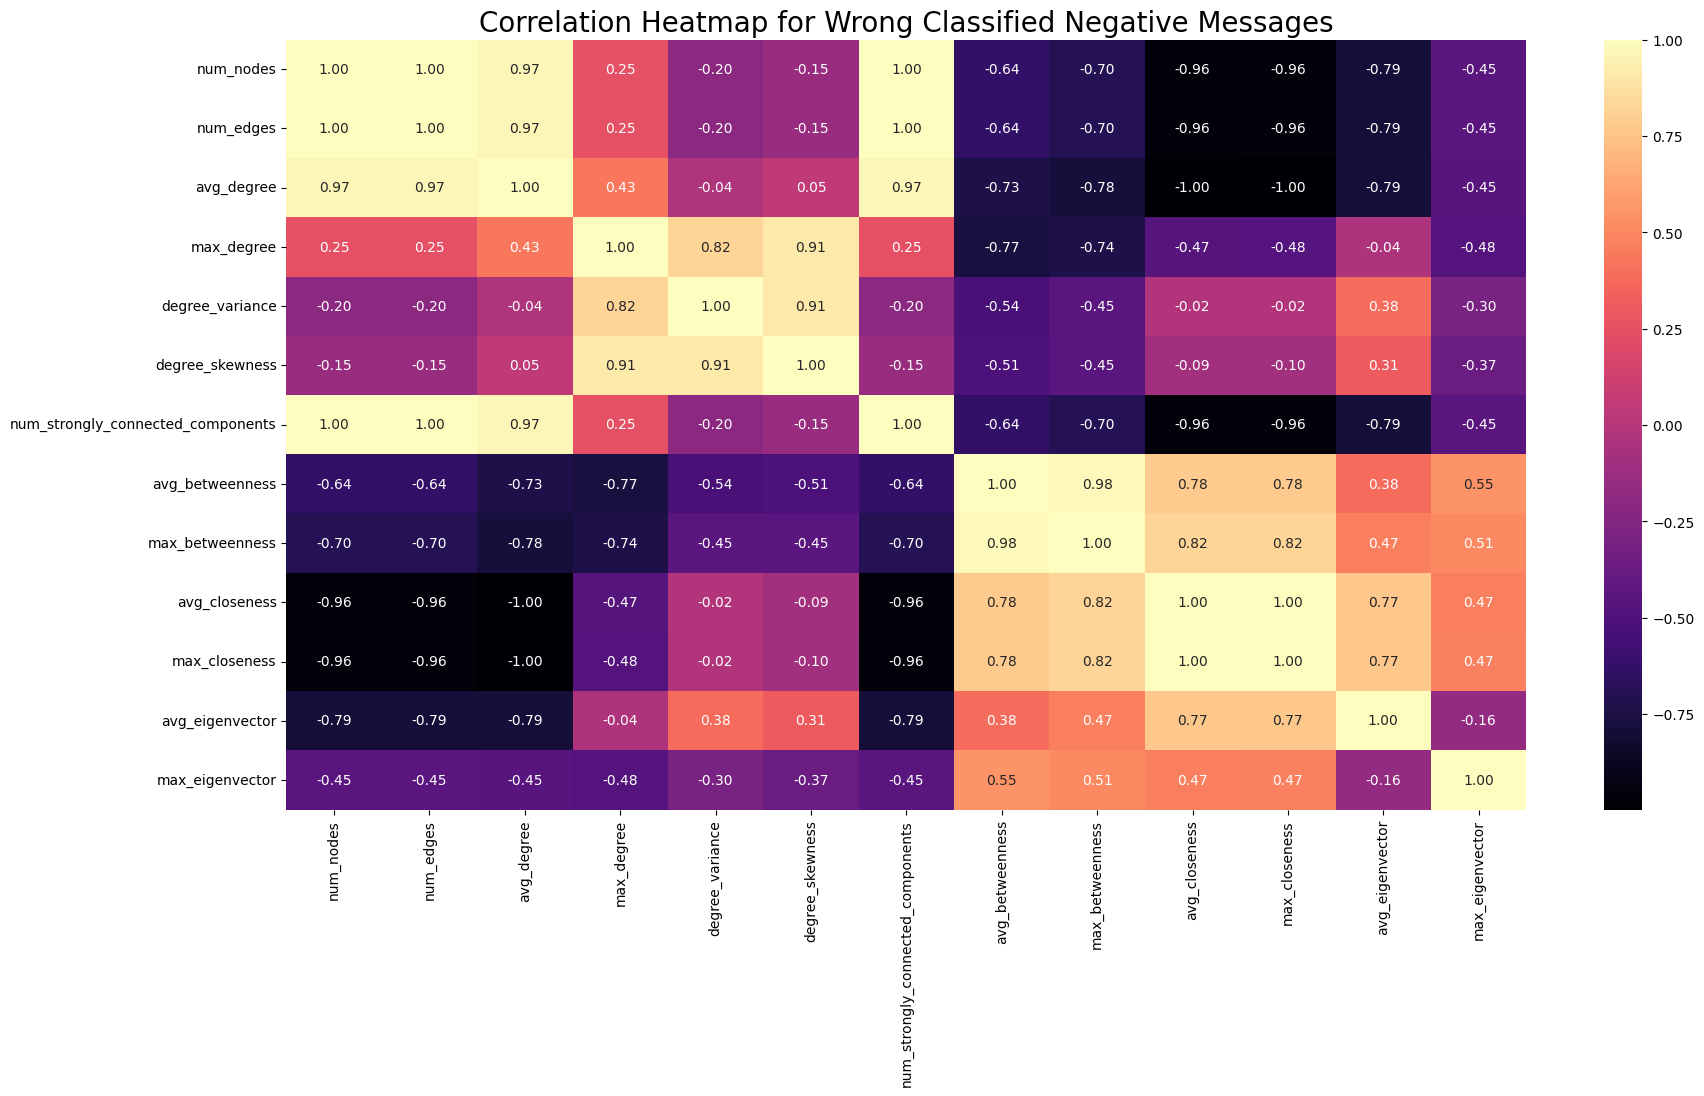

In [198]:
plt.figure(figsize=(20, 10))
sns.heatmap(subdataframes['graph', 0, False].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap for Wrong Classified Negative Messages", fontsize=20)
plt.savefig("correlation_heatmap for Wrong classified negative messages.pdf", format='pdf', bbox_inches='tight')  # 300 DPI for high quality
plt.show()

/tmp/ipykernel_35310/2002359942.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subdataframes['graph', 0, True].corr(), annot=True, cmap='magma', fmt=".2f")


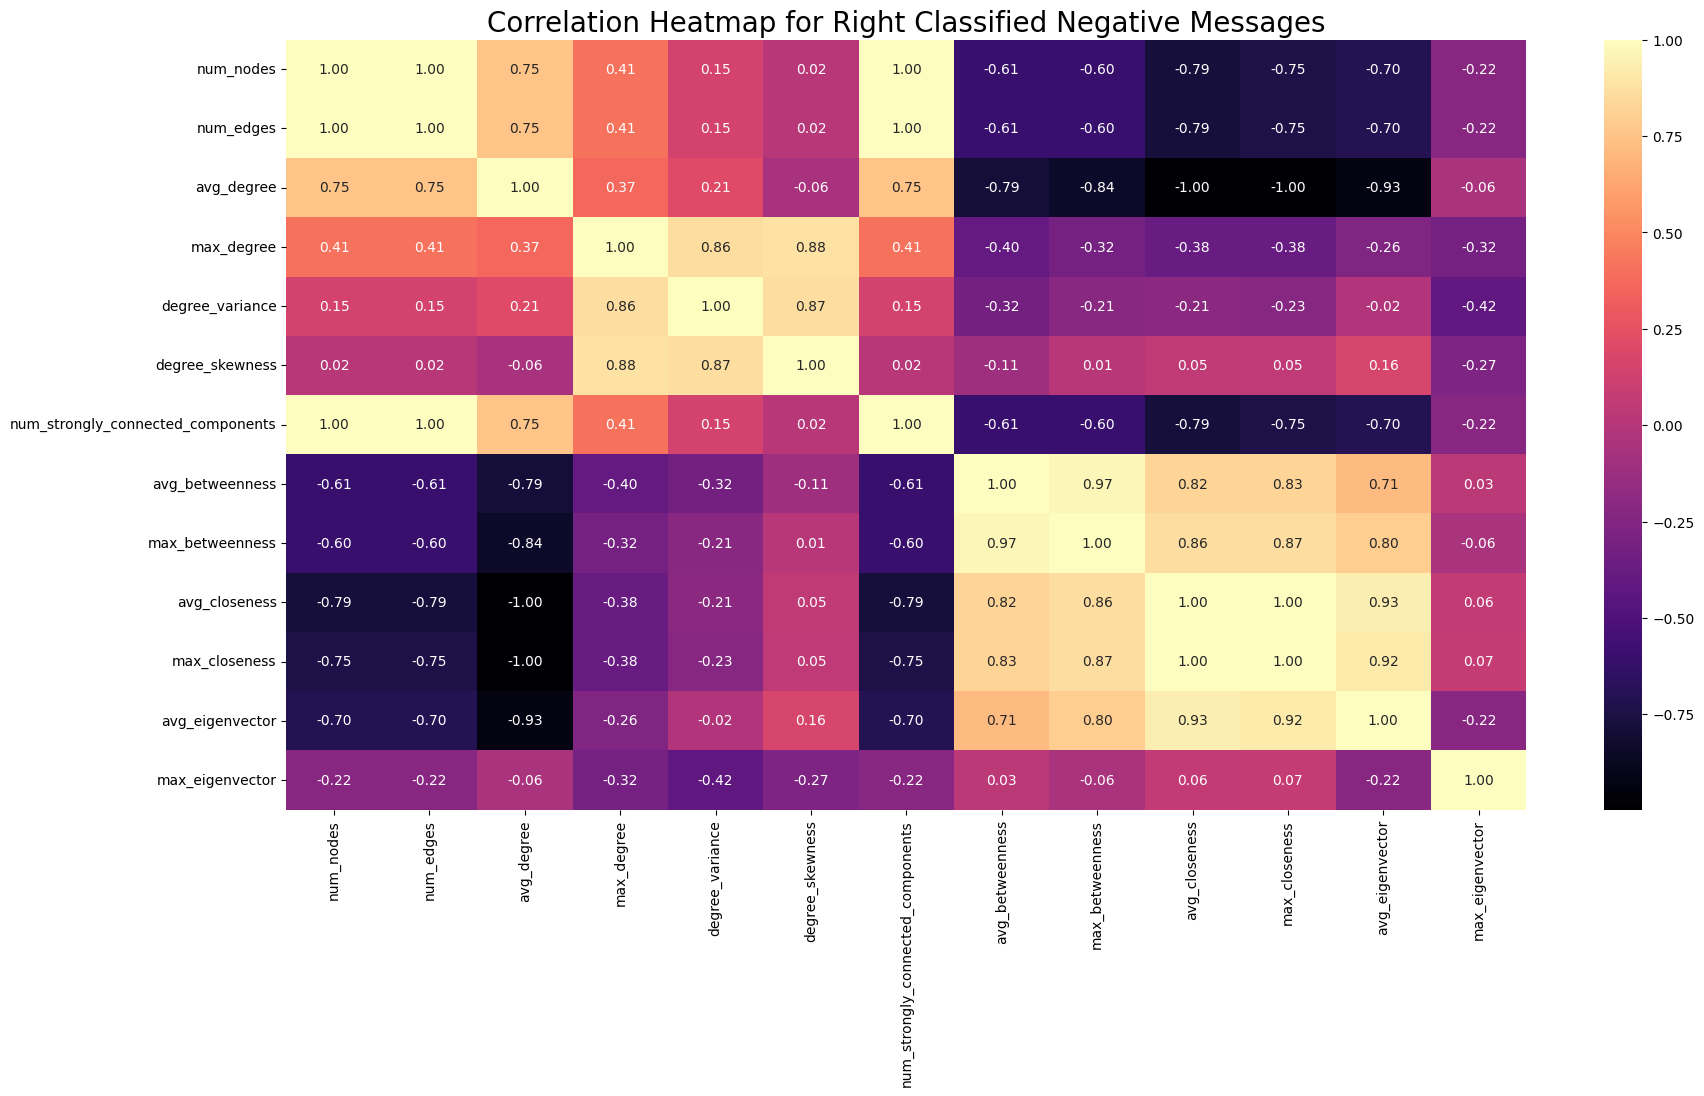

In [197]:
plt.figure(figsize=(20, 10))
sns.heatmap(subdataframes['graph', 0, True].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap for Right Classified Negative Messages", fontsize=20)
plt.savefig("correlation_heatmap for Right classified negative messages.pdf", format='pdf', bbox_inches='tight')  # 300 DPI for high quality
plt.show()

### Scatter Plots

/tmp/ipykernel_35310/3129747638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.scatterplot(x='num_nodes', y='max_degree', data=subdataframes['graph', 0, False].corr())


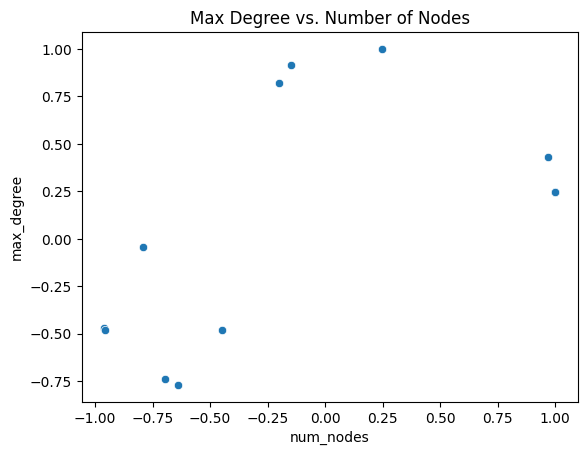

In [195]:
sns.scatterplot(x='num_nodes', y='max_degree', data=subdataframes['graph', 0, False].corr())
plt.title("Max Degree vs. Number of Nodes")
plt.show()